# CF Specialization 2.3 - Fundamentals of Visualization Libraries

### Using the NYC data which was scrapped/brought in from API details I'll use Matplotlib / pyplot to create dual axis charts that showcase our bike count data and avg weather temp data in a bid to see if there are any trends forming

### Script contents:

- Library and Data Importing
- Data Wrangling (Aggs, Merges etc.)
- Dual Axis Plots
- Bonus Histogram + Pie Chart (This step required random sampling due to persoanl PC hardware constraints)

### Library Importing & File Importing

In [1]:
import pandas as pd
import pickle
import os
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import scipy
from scipy.stats import gaussian_kde

In [2]:
df = pd.read_pickle('nyc_data.pkl')

### Step 2: Initial Wrangling Steps

In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [4]:
#unrequired merge from prior scripts data wranglign steps - no longer needed for currrent scripts data validation
df.drop(columns = {'_merge'}, inplace = True)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,2022-01-18 08:23:52,2022-01-18,1.8
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,2022-01-21 09:03:22,2022-01-21,-6.0
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member,2022-01-22 14:28:32,2022-01-22,-5.9
3,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.915840,40.768692,-73.924957,member,2022-01-19 14:49:47,2022-01-19,3.2
4,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,member,2022-01-16 14:36:06,2022-01-16,-8.0


In [6]:
df.shape

(30689921, 16)

In [7]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time            datetime64[ns]
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time            datetime64[ns]
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [10]:
#Setting index as date so that it can be easier to perform preliminary pandas viz plot on
df_temp = df.set_index('date')
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,avgTemp
date,,,,,,,,,,,,,,,
2022-01-18,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,2022-01-18 08:23:52,1.8
2022-01-21,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,2022-01-21 09:03:22,-6.0
2022-01-22,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member,2022-01-22 14:28:32,-5.9
2022-01-19,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.915840,40.768692,-73.924957,member,2022-01-19 14:49:47,3.2
2022-01-16,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,member,2022-01-16 14:36:06,-8.0


<Axes: xlabel='date'>

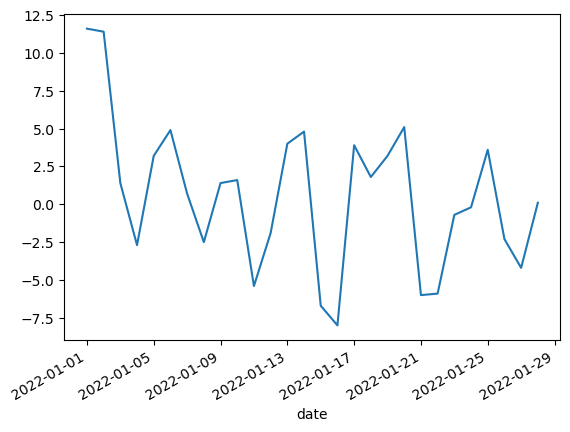

In [23]:
# First million rows of data shown to represent the process - Unable to perform a simple pandas plot due to what may appear to be computing limitations.
df_temp_temporary = df_temp.iloc[0:1000001]
df_temp_temporary['avgTemp'].plot()

In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp'],
      dtype='object')

### Step 2.2 Groupby aggregation and re: merging

In [13]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()
df_group.head()

,date,ride_id
0,2022-01-01,20895
1,2022-01-02,44234
2,2022-01-03,34126
3,2022-01-04,37879
4,2022-01-05,35080


In [14]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          30689921
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20895, 18)
Shape of January 2nd is (44234, 18)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [15]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,
2022-01-01,68FDAB9B6656A4DF,classic_bike,2022-01-01 05:11:08,2022-01-01 05:15:25,W 21 St & 6 Ave,6140.05,W 11 St & 6 Ave,5914.03,40.741740,-73.994156,40.735324,-73.998004,member,2022-01-01 05:11:08,11.6,20895,both
2022-01-01,91C955306D2CF8A6,electric_bike,2022-01-01 20:54:00,2022-01-01 21:06:39,Bedford Ave & Nassau Ave,5550.05,Sharon St & Olive St,5323.05,40.723117,-73.952123,40.715353,-73.938560,member,2022-01-01 20:54:00,11.6,20895,both
2022-01-01,B379B77AEB677F2A,electric_bike,2022-01-01 15:48:06,2022-01-01 16:44:21,Central Park W & W 91 St,7453.01,5 Ave & E 87 St,7323.09,40.788665,-73.966801,40.782323,-73.959875,casual,2022-01-01 15:48:06,11.6,20895,both
2022-01-01,1F1368CC1EEDA296,electric_bike,2022-01-01 02:32:52,2022-01-01 02:44:51,West End Ave & W 78 St,7340.07,W 44 St & 11 Ave,6756.05,40.783786,-73.981687,40.762009,-73.996975,casual,2022-01-01 02:32:52,11.6,20895,both
2022-01-01,9FE4ABC81014D80D,electric_bike,2022-01-01 17:43:17,2022-01-01 17:52:31,Lawrence St & Willoughby St,4596.09,Carroll St & 6 Ave,4019.06,40.692362,-73.986317,40.674089,-73.978728,member,2022-01-01 17:43:17,11.6,20895,both


### Step 3: Dual Axis Plots

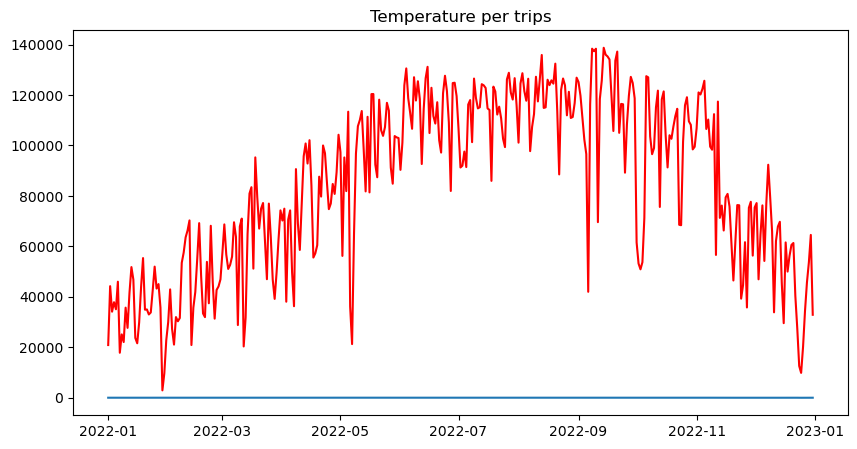

In [16]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'red')
plt.show()

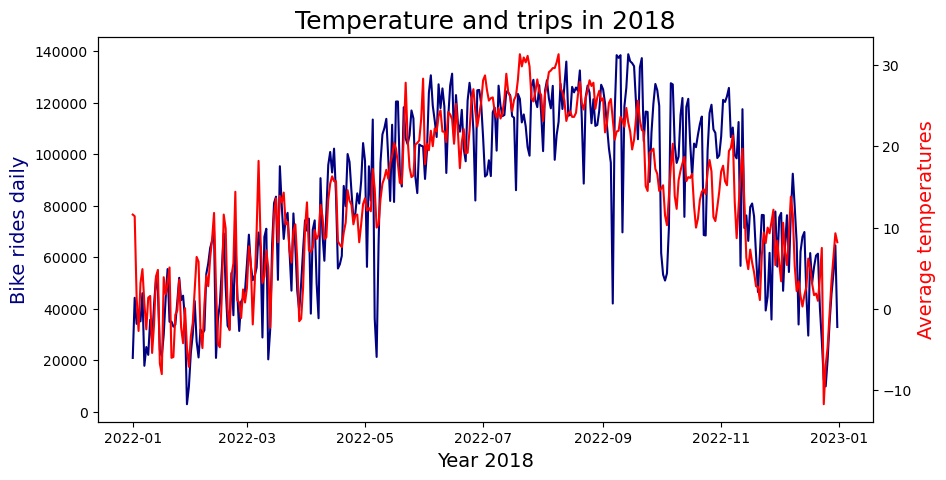

In [17]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2018", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2018', fontsize = 18)
plt.show()

#### Using Matplotlib we can use the subplots function to create two axis that are layered together. Because each axis is it's own individual object, we are able to set specific parameters for each, i.e color, to enhance readability and ensure that each line is clearly matched with the corresponding y axis label.

#### Additionally, the previous plot had a straight line (blue) at the bottom of the image. It only appears that way because of the dispraportionate scaling. By using Subplots we can mitigate that issue by setting each y-axis on either side of the plot to correctly represent the data.

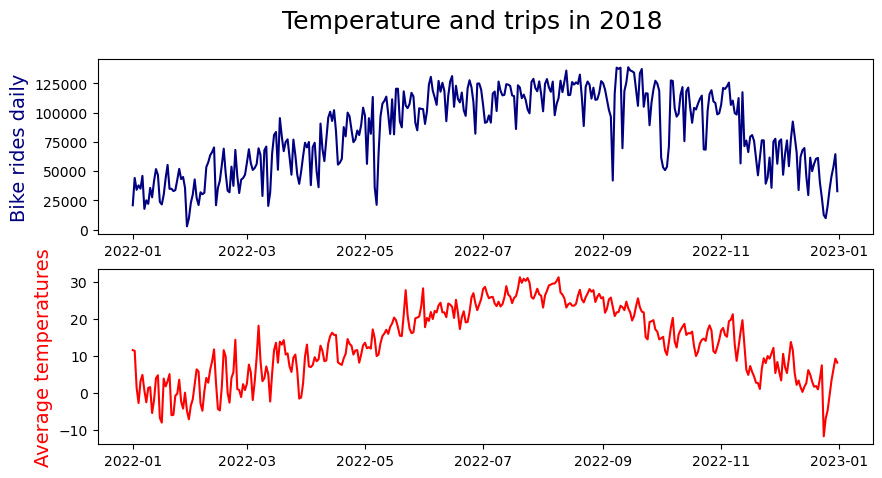

In [18]:
# Creating figure and axis objects with subplots() and details

fig,ax = plt.subplots(2,figsize=(10, 5))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2018', fontsize = 18)
plt.show()

### Step 5 Bonus task - Dual axis for trip duration - Usertype & Gender

#### For this bonus section the main aim is to create a trip duration variable by calculating the time difference between start and trip values and to assess whether there are any differences between the behaviours of different member types.

In [19]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', 'bike_rides_daily',
       '_merge'],
      dtype='object')

In [20]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp,bike_rides_daily,_merge
0,68FDAB9B6656A4DF,classic_bike,2022-01-01 05:11:08,2022-01-01 05:15:25,W 21 St & 6 Ave,6140.05,W 11 St & 6 Ave,5914.03,40.741740,-73.994156,40.735324,-73.998004,member,2022-01-01 05:11:08,2022-01-01,11.6,20895,both
1,91C955306D2CF8A6,electric_bike,2022-01-01 20:54:00,2022-01-01 21:06:39,Bedford Ave & Nassau Ave,5550.05,Sharon St & Olive St,5323.05,40.723117,-73.952123,40.715353,-73.938560,member,2022-01-01 20:54:00,2022-01-01,11.6,20895,both
2,B379B77AEB677F2A,electric_bike,2022-01-01 15:48:06,2022-01-01 16:44:21,Central Park W & W 91 St,7453.01,5 Ave & E 87 St,7323.09,40.788665,-73.966801,40.782323,-73.959875,casual,2022-01-01 15:48:06,2022-01-01,11.6,20895,both
3,1F1368CC1EEDA296,electric_bike,2022-01-01 02:32:52,2022-01-01 02:44:51,West End Ave & W 78 St,7340.07,W 44 St & 11 Ave,6756.05,40.783786,-73.981687,40.762009,-73.996975,casual,2022-01-01 02:32:52,2022-01-01,11.6,20895,both
4,9FE4ABC81014D80D,electric_bike,2022-01-01 17:43:17,2022-01-01 17:52:31,Lawrence St & Willoughby St,4596.09,Carroll St & 6 Ave,4019.06,40.692362,-73.986317,40.674089,-73.978728,member,2022-01-01 17:43:17,2022-01-01,11.6,20895,both


In [21]:
# Function to calculate the difference in minutes
def calculate_minutes(start, end):
    start_time = datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
    end_time = datetime.strptime(end, '%Y-%m-%d %H:%M:%S')
    
    # Adjust end time if it's on the next day
    if end_time < start_time:
        end_time += timedelta(days=1)
    
    time_difference = end_time - start_time
    return time_difference.total_seconds() / 60

# Apply the function to each row and create a new column
df['trip_time'] = df.apply(lambda row: calculate_minutes(row['started_at'], row['ended_at']), axis=1)
df['trip_time'] = df['trip_time'].round()

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp,bike_rides_daily,_merge,trip_time
0,68FDAB9B6656A4DF,classic_bike,2022-01-01 05:11:08,2022-01-01 05:15:25,W 21 St & 6 Ave,6140.05,W 11 St & 6 Ave,5914.03,40.741740,-73.994156,40.735324,-73.998004,member,2022-01-01 05:11:08,2022-01-01,11.6,20895,both,4.0
1,91C955306D2CF8A6,electric_bike,2022-01-01 20:54:00,2022-01-01 21:06:39,Bedford Ave & Nassau Ave,5550.05,Sharon St & Olive St,5323.05,40.723117,-73.952123,40.715353,-73.938560,member,2022-01-01 20:54:00,2022-01-01,11.6,20895,both,13.0
2,B379B77AEB677F2A,electric_bike,2022-01-01 15:48:06,2022-01-01 16:44:21,Central Park W & W 91 St,7453.01,5 Ave & E 87 St,7323.09,40.788665,-73.966801,40.782323,-73.959875,casual,2022-01-01 15:48:06,2022-01-01,11.6,20895,both,56.0
3,1F1368CC1EEDA296,electric_bike,2022-01-01 02:32:52,2022-01-01 02:44:51,West End Ave & W 78 St,7340.07,W 44 St & 11 Ave,6756.05,40.783786,-73.981687,40.762009,-73.996975,casual,2022-01-01 02:32:52,2022-01-01,11.6,20895,both,12.0
4,9FE4ABC81014D80D,electric_bike,2022-01-01 17:43:17,2022-01-01 17:52:31,Lawrence St & Willoughby St,4596.09,Carroll St & 6 Ave,4019.06,40.692362,-73.986317,40.674089,-73.978728,member,2022-01-01 17:43:17,2022-01-01,11.6,20895,both,9.0


In [24]:
#Having computer issues due to qty of data being transformed - exporting post lambda function df to better manage resources
df.to_csv('nyc_data_wtrips.csv')

In [22]:
df['trip_time'].value_counts()

trip_time
6.0        1975994
5.0        1930759
4.0        1882522
7.0        1818304
8.0        1745093
            ...   
12800.0          1
10990.0          1
1780.0           1
7074.0           1
2766.0           1
Name: count, Length: 2918, dtype: int64

In [2]:
#Due to re-running the script after making adjustments to installed libraries/Venv this line is re-importing the previous output instead of re-running the fairly resource intensive commands above.
df_new = pd.read_csv('nyc_data_wtrips.csv',index_col=True)

C:\Users\mojos\AppData\Local\Temp\ipykernel_25120\4207701387.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new = pd.read_csv('nyc_data_wtrips.csv',index_col=False)


In [3]:
#Based on a prior SNS plot generated, realistacally, any trip time over 100 seems to be an outlier - Reducing df to sub 200 for the sake of retaining 'trips'
df_limited = df_new[df_new['trip_time']<=200]
df_limited.shape

(30585109, 20)

<Axes: xlabel='trip_time', ylabel='Count'>

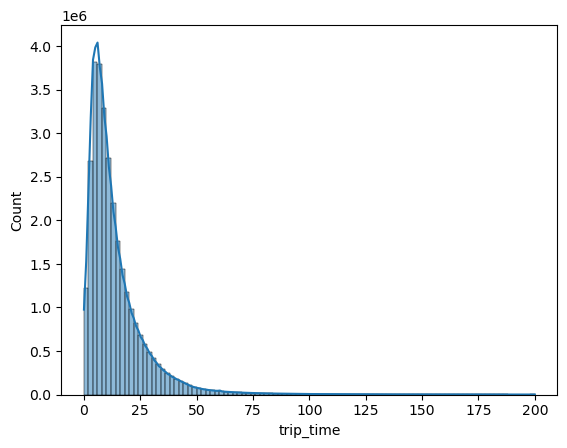

In [4]:
sns.histplot(df_limited['trip_time'], bins=100, kde=True)

In [5]:
value_counts = df_limited['trip_time'].value_counts(ascending=False)
print(value_counts)

trip_time
6.0      1975994
5.0      1930759
4.0      1882522
7.0      1818304
8.0      1745093
          ...   
195.0        406
197.0        384
200.0        363
198.0        356
199.0        347
Name: count, Length: 201, dtype: int64


#### The below section(s) contain the code that I was planning to use to create a bar chart with a KDE curve in matplot lib. I believe I ran into hardware constraints as regarless of how long i waited for the script to run, the final plot would never correctly generate.

#Due to issues with PC hardware I've decided to use random sampling to help reduce the size of the DF that I'm working with.

#Random sampling generation

np.random.seed(4)
dev_agg = np.random.rand(len(df_limited)) <= 0.7

#Storing everything that is 'dev_agg' (or under 0.7 random value) from the agg DF - 70%

big_agg = df_limited[dev_agg]
small_agg = df_limited[~dev_agg]

#Validating output of sampling
len(df_limited)

len(big_agg) + len(small_agg)

#Seperating out important column (trip duration in this case)
hist_data = small_agg['trip_time']
                         
#Generating Viz
plt.hist(hist_data, bins=100, density=True, alpha=0.6)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Histogram')
                    
#Showing Plot
plt.show()

#Kernel Density Estimation(KDE)
kde = gaussian_kde(hist_data)
num_points = len(hist_data)
x = np.linspace(min(hist_data), max(hist_data), num_points)
kde_values = kde(x)

#With curve line following bin plots (using KDE)

#Creating plot
plt.hist(hist_data, bins=100, density=True, alpha=0.6)
plt.plot(x, kde_values, 'k', linewidth=2)

#Viz labels and titles
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

#### End of Markdown section which could be used *INSTEAD* of the more straightforward seaborn code

### Final Bonus Task - Creating a subplot of two seperate chart types

In [5]:
#This will be our simple dataframe for our pie chart data using counts to summarise qtys of rides.
member_count_unique = df_limited.groupby(['member_casual'])['ride_id'].nunique().reset_index()

In [6]:
member_count_unique.head()

,member_casual,ride_id
0,casual,6641316
1,member,23943793


In [12]:
#In order to create a stacked bar chart, I just want to isolate the individual month that each ride took place so that we can perform a crosstab of the relevant information.
df_limited.loc[:,'date_new'] = pd.to_datetime(df_limited['started_at'])
df_limited.loc[:,'month'] = df_limited['date_new'].dt.month

In [13]:
df_limited.head(1)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_lng,member_casual,start_time,date,avgTemp,bike_rides_daily,_merge,trip_time,date_new,month
0,0,68FDAB9B6656A4DF,classic_bike,2022-01-01 05:11:08,2022-01-01 05:15:25,W 21 St & 6 Ave,6140.05,W 11 St & 6 Ave,5914.03,40.74174,...,-73.998004,member,2022-01-01 05:11:08,2022-01-01,11.6,20895,both,4.0,2022-01-01 05:11:08,1


In [15]:
crosstab = pd.crosstab(df_limited['month'],df_limited['rideable_type'],dropna=False)

rideable_type,classic_bike,docked_bike,electric_bike
month,,,
1,594045,2727,446740
2,673834,5103,551357
3,1097121,13529,777191
4,1463415,30552,818987
5,2079050,35074,816968
6,2516613,34923,869451
7,2623486,37132,825231
8,2873065,36875,757645
9,2803917,27742,662875


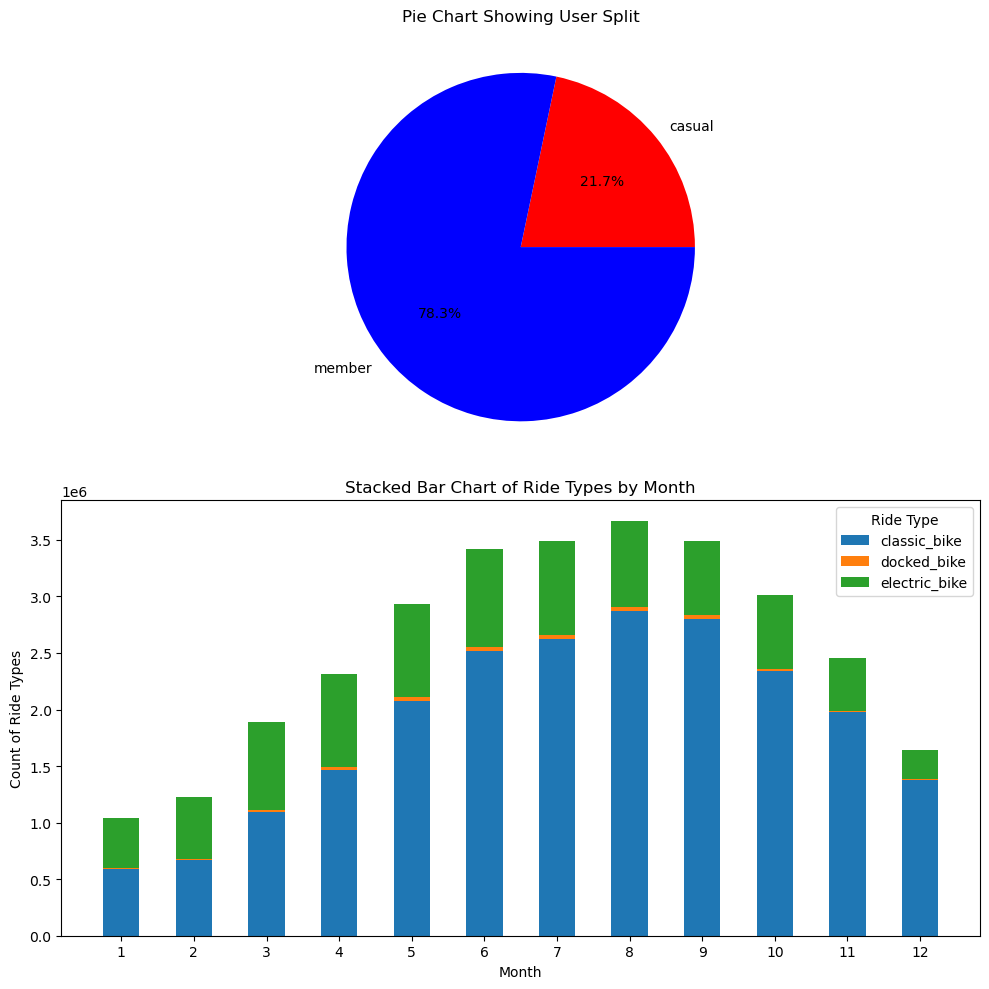

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

#Preliminary Pie Chart
ax[0].pie(member_count_unique['ride_id'], labels=member_count_unique['member_casual'], colors=['r','b'], autopct='%1.1f%%')
ax[0].set_title('Pie Chart Showing User Split')

# Define bar positions and width for the second subplot
bar_positions = range(len(crosstab))
bar_width = 0.5

# Initialize bottom values for stacking
bottom_values = [0] * len(crosstab)

# Plot each layer of the stack in the second subplot
for ride_type in crosstab.columns:
    ax[1].bar(bar_positions, crosstab[ride_type], bar_width, bottom=bottom_values, label=ride_type)
    bottom_values = [i+j for i,j in zip(bottom_values, crosstab[ride_type])]

# Add labels, title, and legend to the second subplot
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Count of Ride Types')
ax[1].set_title('Stacked Bar Chart of Ride Types by Month')
ax[1].set_xticks(bar_positions)
ax[1].set_xticklabels(crosstab.index)
ax[1].legend(title='Ride Type')

# Adjust layout and show plot
plt.tight_layout()
plt.show()